분석방향

철도승객/관광객 분석 (+도내관광객) 
지역별 대중교통시설의 수 비교



### 지역별 대중교통시설의 수 비교


POI (Point Of Interest)는 관심지점, 관심지역정보를 뜻하는데요. 고속터미널역, 서울서초경찰서, 서울고속버스터미널, 백화점, 주유소, 은행, 영화관 등.. 콕콕 짚어서 볼 수 있는 지명, 시설물을 말합니다

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (38.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and di

In [ ]:
import pandas as pd
public_transport_data= pd.read_csv("/content/drive/MyDrive/관광거점도시/국내 지역별 문화향유를 위한 대중교통 시설 데이터.csv")
public = public_transport_data['sgg_nm'].str.contains("전주|목포|강릉",na=False)
#  데이터 필터링
subset_df = public_transport_data[public]
not_loaded = subset_df['mcate_nm'] != '화물/기타터미널'

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
subset_df = subset_df[not_loaded]
subset_df.loc[subset_df['sgg_nm'] == "전주시 덕진구",'sgg_nm']="전주시"
subset_df.loc[subset_df['sgg_nm'] == "전주시 완산구",'sgg_nm']="전주시"

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
count_df=subset_df.groupby(by=['mcate_nm','sgg_nm'], as_index=False).count()
count_df=count_df[['mcate_nm','sgg_nm','poi_nm']]
count_df.sort_values(by='sgg_nm',ascending=True)

,mcate_nm,sgg_nm,poi_nm
0,경강선,강릉시,4
19,일반철도역명,강릉시,2
17,시외버스터미널,강릉시,1
14,시내버스정류장명,강릉시,3
22,일반페리터미널,강릉시,2
9,기타철도역명,강릉시,2
7,국도/지방도휴게소,강릉시,6
11,버스/택시/화물차고지,강릉시,24
4,고속버스터미널,강릉시,2
1,고속/주요철도역명,강릉시,2


In [ ]:
all=subset_df[['sgg_nm','mcate_nm','poi_nm']]
all=all.sort_values(by='sgg_nm',ascending=True)

In [ ]:
count_df=all.groupby(by=['sgg_nm','mcate_nm'], as_index=False).count()

In [ ]:
count_df2=all.groupby(by=['sgg_nm'], as_index=False).count()
count_df2=count_df2[['sgg_nm','mcate_nm']]
count_df2=count_df2.set_index('sgg_nm')

In [ ]:
counting_public = count_df2.rename(columns={'mcate_nm':'대중교통'})
counting_public

,대중교통
sgg_nm,
강릉시,48
목포시,27
전주시,43


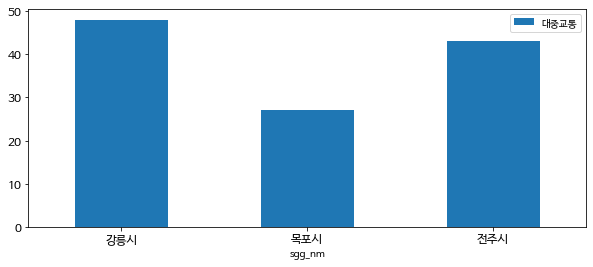

In [ ]:
#지역별 대중교통 시설 수
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
public_plt = counting_public.plot(kind='bar', figsize=(10, 4), fontsize=12,rot = 0 )

## 관광객

In [ ]:
import pandas as pd
gn_day= pd.read_csv("/content/drive/MyDrive/관광거점도시/(KT)플랫폼통합경진대회_강릉시_시군구_1.일별관광객수.csv",encoding='cp949',thousands=',')
gn_gender= pd.read_csv("/content/drive/MyDrive/관광거점도시/(KT)플랫폼통합경진대회_강릉시_시군구_2.성연령별관광객수.csv", encoding='cp949',thousands=',')
gn_time= pd.read_csv("/content/drive/MyDrive/관광거점도시/(KT)플랫폼통합경진대회_강릉시_시군구_3.시간대별관광객수.csv", encoding='cp949',thousands=',')
gn_in= pd.read_csv("/content/drive/MyDrive/관광거점도시/(KT)플랫폼통합경진대회_강릉시_시군구_6.거주지기반유입비율.csv", encoding='cp949',thousands=',')
gn_24h= pd.read_csv("/content/drive/MyDrive/관광거점도시/(KT)플랫폼통합경진대회_강릉시_시군구_7.24시간이후이동비율(외지인).csv", encoding='cp949',thousands=',')


해당 시군구 현지인 관광객수
외지인

In [ ]:
gn_day1=gn_day[['SGG_NM','I_CNT','O_CNT']]
gn_day1=gn_day1.groupby(by=['SGG_NM'], as_index=False).mean()


In [ ]:
gn_time1=gn_time[['TIMEZN_DIV_CD','I_CNT','O_CNT']]
gn_time1=gn_time1.groupby(by=['TIMEZN_DIV_CD'], as_index=False).sum()
gn_time1=gn_time1.set_index('TIMEZN_DIV_CD')

In [ ]:
gn_24h1=gn_24h[['RESD_INFO','O_RATE_CNT']]
gn_24h1=gn_24h1.sort_values('O_RATE_CNT',ascending=False)
gn_24h1

,RESD_INFO,O_RATE_CNT
2483,강원도 강릉시,70.841659
1152,강원도 강릉시,70.263729
939,강원도 강릉시,70.191564
2690,강원도 강릉시,70.069298
4264,강원도 강릉시,69.594644
...,...,...
33885,경상북도 성주군,0.002185
33884,경상남도 창원시 성산구,0.002185
33883,전라남도 보성군,0.002185
33882,전라남도 장흥군,0.002185


In [ ]:
gn_24h1=gn_24h1.groupby(by=['RESD_INFO'], as_index=False).mean()
gn_24h1=gn_24h1.sort_values('O_RATE_CNT',ascending=False)

In [ ]:
import pandas as pd
jj_day= pd.read_csv("/content/drive/MyDrive/관광거점도시/(KT)플랫폼통합경진대회_전주시_시군구_1.일별관광객수.csv",encoding='cp949',thousands=',')
jj= pd.read_csv("/content/drive/MyDrive/관광거점도시/(KT)플랫폼통합경진대회_전주시_시군구_2.성연령별관광객수.csv", encoding='cp949',thousands=',')
jj_time= pd.read_csv("/content/drive/MyDrive/관광거점도시/(KT)플랫폼통합경진대회_전주시_시군구_3.시간대별관광객수.csv", encoding='cp949',thousands=',')
jj_24h= pd.read_csv("/content/drive/MyDrive/관광거점도시/(KT)플랫폼통합경진대회_전주시_시군구_7.24시간이후이동비율(외지인).csv", encoding='cp949',thousands=',')

In [ ]:
jj_day1=jj_day[['SGG_NM','I_CNT','O_CNT']]
jj_day1=jj_day1.groupby(by=['SGG_NM'], as_index=False).mean()
jj_day1

,SGG_NM,I_CNT,O_CNT
0,전주시,321698.380435,169283.862319


In [ ]:
jj_time1=jj_time[['TIMEZN_DIV_CD','I_CNT','O_CNT']]
jj_time1=jj_time1.groupby(by=['TIMEZN_DIV_CD'], as_index=False).sum()
jj_time1=jj_time1.set_index('TIMEZN_DIV_CD')

In [ ]:
jj_24h1=jj_24h[['RESD_INFO','O_RATE_CNT']]
jj_24h1=jj_24h1.groupby(by=['RESD_INFO'], as_index=False).mean()
jj_24h1=jj_24h1.sort_values('O_RATE_CNT',ascending=False)
jj_24h1

,RESD_INFO,O_RATE_CNT
215,전라북도 전주시 덕진구,32.908656
216,전라북도 전주시 완산구,31.853025
211,전라북도 완주군,4.752700
212,전라북도 익산시,2.483248
206,전라북도 김제시,1.840386
...,...,...
102,경상북도 청송군,0.011758
5,강원도 양구군,0.011470
89,경상북도 봉화군,0.010931
13,강원도 태백시,0.010531


In [ ]:
import pandas as pd
mp_day= pd.read_csv("/content/drive/MyDrive/관광거점도시/(KT)플랫폼통합경진대회_목포시_시군구_1.일별관광객수.csv",encoding='cp949',thousands=',')
mp= pd.read_csv("/content/drive/MyDrive/관광거점도시/(KT)플랫폼통합경진대회_목포시_시군구_2.성연령별관광객수.csv", encoding='cp949',thousands=',')
mp_time= pd.read_csv("/content/drive/MyDrive/관광거점도시/(KT)플랫폼통합경진대회_목포시_시군구_3.시간대별관광객수.csv", encoding='cp949',thousands=',')
mp_24h= pd.read_csv("/content/drive/MyDrive/관광거점도시/(KT)플랫폼통합경진대회_목포시_시군구_7.24시간이후이동비율(외지인).csv", encoding='cp949',thousands=',')

In [ ]:
mp_day1=mp_day[['SGG_NM','F_CNT','I_CNT','O_CNT']]
mp_day1=mp_day1.groupby(by=['SGG_NM'], as_index=False).mean()
mp_day1

,SGG_NM,I_CNT,O_CNT
0,목포시,150504.75,57935.268116


In [ ]:
mp_time1=mp_time[['TIMEZN_DIV_CD','I_CNT','O_CNT']]
mp_time1=mp_time1.groupby(by=['TIMEZN_DIV_CD'], as_index=False).sum()
mp_time1=mp_time1.set_index('TIMEZN_DIV_CD')

In [ ]:
mp_24h1=mp_24h[['RESD_INFO','O_RATE_CNT']]
mp_24h1=mp_24h1.groupby(by=['RESD_INFO'], as_index=False).mean()
mp_24h1=mp_24h1.sort_values('O_RATE_CNT',ascending=False)
mp_24h1

,RESD_INFO,O_RATE_CNT
189,전라남도 목포시,53.779119
190,전라남도 무안군,6.229569
196,전라남도 영암군,3.767719
193,전라남도 신안군,3.170263
110,광주광역시 서구,1.986168
...,...,...
97,경상북도 예천군,0.014187
11,강원도 철원군,0.014000
89,경상북도 봉화군,0.013848
5,강원도 양구군,0.013098


#관광객(현지인, 외지인)

```
# 코드로 형식 지정됨
```



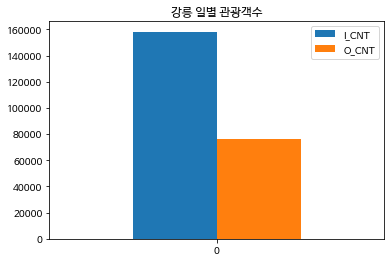

In [ ]:
gn_day1.plot(kind='bar', rot=0)
plt.title("강릉 일별 관광객수")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


([<matplotlib.patches.Wedge at 0x7fc05db1ffd0>,
 [Text(-0.5736282565188489, 0.9385896991354348, '현지인'),
  Text(0.5736282565188482, -0.9385896991354351, '외지인')])

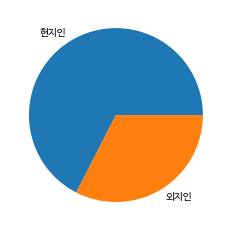

In [ ]:
import matplotlib.pyplot as plt
plt.pie(gn_day1[['I_CNT','O_CNT','F_CNT']],labels=['현지인','외지인,'외국인'])
plt.show()

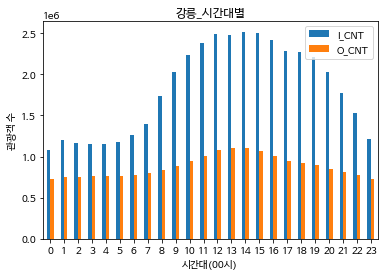

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

gn_time1.plot(kind='bar', rot=0)
plt.title("강릉_시간대별")
plt.xlabel("시간대(00시)")
plt.ylabel("관광객 수")
plt.legend(loc='upper right',fontsize=10)
plt.show()

**외지인관광객 24시간 이동비율**

In [ ]:
gn_24h1

,RESD_INFO,O_RATE_CNT
0,강원도 강릉시,70.841659
14,강원도 평창군,8.284668
6,강원도 양양군,5.489985
4,강원도 속초시,5.345920
17,강원도 횡성군,4.573978
...,...,...
183,전라남도 고흥군,0.039857
218,전라북도 진안군,0.036478
214,전라북도 장수군,0.033281
203,전라남도 화순군,0.032461


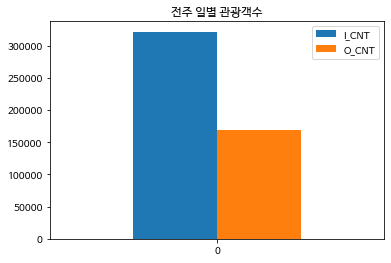

In [ ]:
jj_day1.plot(kind='bar', rot=0)
plt.title("전주 일별 관광객수")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


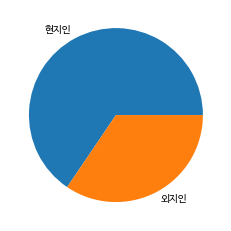

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.pie(jj_day1[['I_CNT','O_CNT']],labels=['현지인','외지인'])
plt.show()

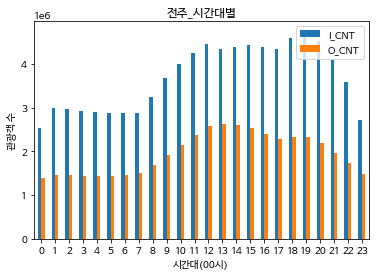

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

jj_time1.plot(kind='bar', rot=0)
plt.title("전주_시간대별")
plt.xlabel("시간대(00시)")
plt.ylabel("관광객 수")
plt.legend(loc='upper right',fontsize=10)
plt.show()

In [ ]:
jj_24h1

,RESD_INFO,O_RATE_CNT
215,전라북도 전주시 덕진구,32.908656
216,전라북도 전주시 완산구,31.853025
211,전라북도 완주군,4.752700
212,전라북도 익산시,2.483248
206,전라북도 김제시,1.840386
...,...,...
102,경상북도 청송군,0.011758
5,강원도 양구군,0.011470
89,경상북도 봉화군,0.010931
13,강원도 태백시,0.010531


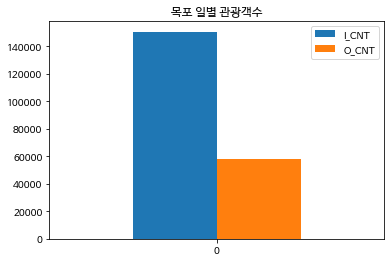

In [ ]:
mp_day1.plot(kind='bar', rot=0)
plt.title("목포 일별 관광객수")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


([<matplotlib.patches.Wedge at 0x7fbec0755a50>,
 [Text(-0.7066184306703482, 0.8430245509099806, '현지인'),
  Text(0.7066184306703485, -0.8430245509099804, '외지인')])

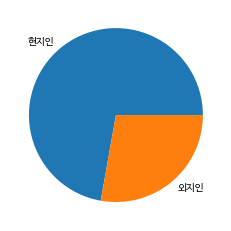

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.pie(mp_day1[['I_CNT','O_CNT']],labels=['현지인','외지인'])
plt.show()

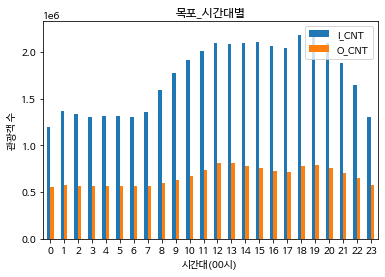

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

mp_time1.plot(kind='bar', rot=0)
plt.title("목포_시간대별")
plt.xlabel("시간대(00시)")
plt.ylabel("관광객 수")
plt.legend(loc='upper right',fontsize=10)
plt.show()

In [ ]:
mp_24h1

,RESD_INFO,O_RATE_CNT
189,전라남도 목포시,53.779119
190,전라남도 무안군,6.229569
196,전라남도 영암군,3.767719
193,전라남도 신안군,3.170263
110,광주광역시 서구,1.986168
...,...,...
97,경상북도 예천군,0.014187
11,강원도 철원군,0.014000
89,경상북도 봉화군,0.013848
5,강원도 양구군,0.013098


0. 대중교통시설의 수 **강릉>전주>>목포**

1. 현지인>외지인 관광객

2. 시간대별 

      강릉: 12시 -- 14시

      전주: 18시 -- 20시

      목포:18시 -- 20시

        *주로 오후-저녁에 많고 아침과 밤에는 현저히 적음.
                            식사시간? 혹은 그시간에 도착?

3. 24시간 이후 외지인의 이동비율
반 이상은 24시간이상 머무름 - 숙박의 필요성?

